In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
import datetime
%matplotlib inline

1. Calculate some descriptive statistics for how many jobs per hour are being completed. What does the completions per hour look like over the time span of the dataset? Are there weekly trends, and has it been increasing over the last year?

In [2]:
#read in the csv
fullsample = pd.read_csv('../accre-candy-corn/accre-scheduler-data-2021/fullsample.csv')
#convert BEGIN date column to dtype datetime64[ns]
fullsample['BEGIN'] = pd.to_datetime(fullsample['BEGIN'], errors='coerce', infer_datetime_format = True)
#convert END date column to dtype datetime64[ns]
fullsample['END'] = pd.to_datetime(fullsample['END'], errors='coerce', infer_datetime_format = True)

In [3]:
fullsample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7395885 entries, 0 to 7395884
Data columns (total 12 columns):
 #   Column     Dtype         
---  ------     -----         
 0   JOBID      object        
 1   STATE      object        
 2   BEGIN      datetime64[ns]
 3   END        datetime64[ns]
 4   REQMEM     object        
 5   USEDMEM    object        
 6   REQTIME    object        
 7   USEDTIME   object        
 8   NODES      int64         
 9   CPUS       int64         
 10  PARTITION  object        
 11  EXITCODE   object        
dtypes: datetime64[ns](2), int64(2), object(8)
memory usage: 677.1+ MB


In [4]:
fullsample[fullsample['END'] == 'NaT']

,JOBID,STATE,BEGIN,END,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE


In [5]:
fullsample[fullsample['STATE']== 'FAILED'].value_counts().sum()

3766

In [6]:
fullsample[fullsample['STATE']== 'COMPLETED'].value_counts().sum()

7375084

In [7]:
fullsample[fullsample['STATE']== 'CANCELLED'].value_counts().sum()

9055

In [8]:
fullsample[fullsample['STATE']== 'TIMEOUT'].value_counts().sum()

0

In [9]:
fullsample[fullsample['STATE']== 'PREEMPTED'].value_counts().sum()

0

In [4]:
fullsample['STATE'].value_counts()

COMPLETED              7375084
CANCELLED                 9055
FAILED                    3766
CANCELLED by 9201         1776
OUT_OF_MEMORY             1739
                        ...   
CANCELLED by 9204            1
CANCELLED by 686562          1
CANCELLED by 793827          1
CANCELLED by 9211            1
CANCELLED by 794875          1
Name: STATE, Length: 145, dtype: int64

In [5]:
fullsample['EXITCODE'].value_counts()

0:0      7384480
1:0         4958
0:15        1887
0:125       1739
0:9         1361
2:0          508
0:7          389
121:0         89
127:0         88
13:0          68
24:0          67
0:11          35
38:0          32
28:0          29
6:0           27
126:0         24
0:6           18
0:2           16
7:0           12
29:0          12
16:0           9
59:0           8
9:0            4
0:40           4
125:0          3
8:0            3
0:105          2
67:0           1
4:0            1
116:0          1
11:0           1
30:0           1
0:98           1
3:0            1
0:12           1
85:0           1
103:0          1
43:0           1
0:8            1
76:0           1
Name: EXITCODE, dtype: int64

In [6]:
completed_jobs = fullsample[fullsample['STATE']=='COMPLETED']

In [21]:
(fullsample['END']-fullsample['BEGIN'])

0                      NaT
1         30 days 00:00:23
2         30 days 00:00:14
3         29 days 04:00:04
4         24 days 09:00:17
                ...       
7395880    0 days 00:01:46
7395881    0 days 00:01:25
7395882    0 days 00:03:14
7395883    0 days 00:01:56
7395884    0 days 00:03:08
Length: 7395885, dtype: timedelta64[ns]

In [8]:
fullsample.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7395885 entries, 2020-10-01 00:10:15 to NaT
Data columns (total 11 columns):
 #   Column     Dtype         
---  ------     -----         
 0   JOBID      object        
 1   STATE      object        
 2   BEGIN      datetime64[ns]
 3   REQMEM     object        
 4   USEDMEM    object        
 5   REQTIME    object        
 6   USEDTIME   object        
 7   NODES      int64         
 8   CPUS       int64         
 9   PARTITION  object        
 10  EXITCODE   object        
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 677.1+ MB


In [7]:
completed_jobs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7375084 entries, 1 to 7395884
Data columns (total 12 columns):
 #   Column     Dtype         
---  ------     -----         
 0   JOBID      object        
 1   STATE      object        
 2   BEGIN      datetime64[ns]
 3   END        datetime64[ns]
 4   REQMEM     object        
 5   USEDMEM    object        
 6   REQTIME    object        
 7   USEDTIME   object        
 8   NODES      int64         
 9   CPUS       int64         
 10  PARTITION  object        
 11  EXITCODE   object        
dtypes: datetime64[ns](2), int64(2), object(8)
memory usage: 731.5+ MB


In [8]:
completed_jobs = completed_jobs.sort_values('BEGIN')

In [9]:
#completed_jobs['rolling_per_hour'] = completed_jobs.rolling('1h', on = 'END')['JOBID'].count()
completed_jobs['rolling_per_hour'] = completed_jobs.rolling('1h', on = 'BEGIN')['JOBID'].count()

In [10]:
completed_jobs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7375084 entries, 6640560 to 1491978
Data columns (total 13 columns):
 #   Column            Dtype         
---  ------            -----         
 0   JOBID             object        
 1   STATE             object        
 2   BEGIN             datetime64[ns]
 3   END               datetime64[ns]
 4   REQMEM            object        
 5   USEDMEM           object        
 6   REQTIME           object        
 7   USEDTIME          object        
 8   NODES             int64         
 9   CPUS              int64         
 10  PARTITION         object        
 11  EXITCODE          object        
 12  rolling_per_hour  float64       
dtypes: datetime64[ns](2), float64(1), int64(2), object(8)
memory usage: 787.7+ MB


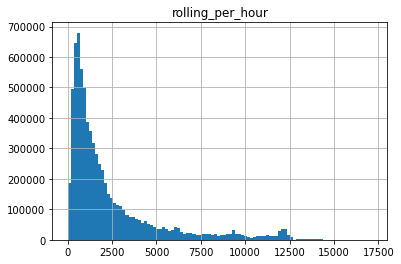

In [11]:
completed_jobs.hist('rolling_per_hour', bins = 100);

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


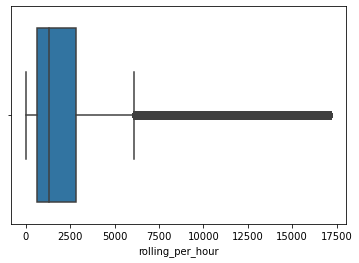

In [12]:
sns.boxplot(completed_jobs['rolling_per_hour']);

In [14]:
completed_jobs['rolling_per_hour'].describe()

count    7.375084e+06
mean     2.358120e+03
std      2.737708e+03
min      1.000000e+00
25%      6.430000e+02
50%      1.314000e+03
75%      2.826000e+03
max      1.714100e+04
Name: rolling_per_hour, dtype: float64

In [40]:
sns.lineplot(completed_jobs, x = 'BEGIN', y = 'rolling_per_hour')

ValueError: Could not interpret value `rolling_per_hour` for parameter `y`

In [13]:
completed_jobs['rolling_per_week'] = completed_jobs.rolling('7d', on = 'BEGIN')['JOBID'].count()

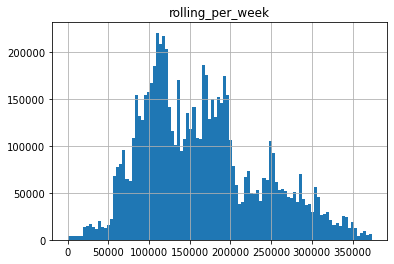

In [15]:
completed_jobs.hist('rolling_per_week', bins = 100);

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


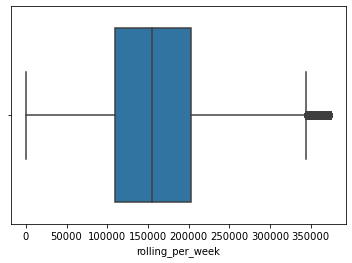

In [16]:
sns.boxplot(completed_jobs['rolling_per_week']);

KeyboardInterrupt: 

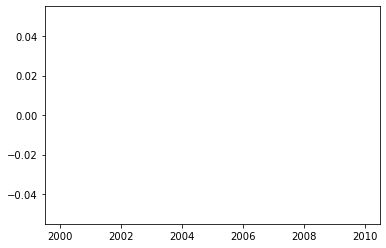

In [18]:
sns.lineplot(data = completed_jobs, x = 'BEGIN' , y = 'rolling_per_week');

https://pandas.pydata.org/docs/reference/api/pandas.DatetimeIndex.dayofweek.html

Try to convert to day of the week and plot by day of the week to see if there's a drop off on a particular day of the week. the seaborn plot above took a long time and didn't not show up after waiting >5 minutes

In [ ]:
#slurm_ce5['user'] = slurm_ce5['user'].str.slice(start = 5)